<a href="https://colab.research.google.com/github/Akshay-Rajesh/Note/blob/main/Logistic_regression_%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**we have a data set - Social_Network_Ads and we have to create a model for output purchased .**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
data["Purchased"].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Gender is categorical we have to convert to numerical

#one hot encoding

data = pd.get_dummies(data)

In [ ]:
data.head(3)

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0


In [ ]:
#SPlitting the dataset
#we drop user ID as its not going to impact our output

X = data.drop(["User ID","Purchased"] , axis =1)
y = data["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [ ]:
X_train.shape

(320, 4)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

logit_model.fit(X_train , y_train)

y_pred = logit_model.predict(X_test)

In [ ]:
# now we have to check the accuracy of our model

from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score 

In [ ]:
print("Accuracy is :'" , accuracy_score(y_test,y_pred))
print("precision is : " , precision_score(y_test,y_pred))
print("recall score is : " , recall_score(y_test,y_pred))
print("f1_score : " , f1_score(y_test,y_pred))

Accuracy is :' 0.65
precision is :  0.0
recall score is :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We see our accuracy is 65 % which is very low and we do not have any valuefor other scores so our model is not that great , lets try to improve it .**

In [ ]:
# print confusion matrix

confusion_matrix(y_test ,y_pred)

array([[52,  0],
       [28,  0]])

**We print a confusing matrix and we can see our model predicte 28 incorrect values .**

### **KNN model**

In [ ]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
# we have to find optimum k values 

acc_values =[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k , metric="minkowski")
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)

When we do KNN method , first we have to find the correct k value to be used for our model , above code does that job

In [ ]:
print(acc_values)

[0.9375, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925]


Text(0, 0.5, 'Accuracy')

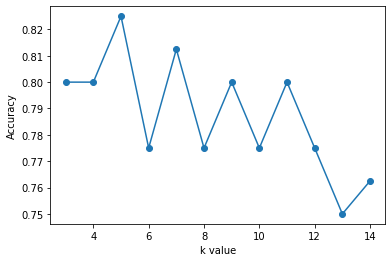

In [ ]:
plt.plot(neighbors,acc_values , "o-")
plt.xlabel("k value")
plt.ylabel("Accuracy")

In [ ]:
# from the above graph it is clear that we get highest accuracy when we use k value as 5 
# We create a model using k = 5
classifier = KNeighborsClassifier(n_neighbors=5 , metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy is :'" , accuracy_score(y_test,y_pred))
print("precision is : " , precision_score(y_test,y_pred))
print("recall score is : " , recall_score(y_test,y_pred))
print("f1_score : " , f1_score(y_test,y_pred))

Accuracy is :' 0.825
precision is :  0.7692307692307693
recall score is :  0.7142857142857143
f1_score :  0.7407407407407408


In [ ]:
confusion_matrix(y_test ,y_pred)

array([[46,  6],
       [ 8, 20]])

In [ ]:
# Above confusion metric has predicted 14 wrong values 8+6

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


In [ ]:
# lets do standard scaling to improve our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# we again create logistric regression
logit_model = LogisticRegression()

logit_model.fit(X_train , y_train)

y_pred = logit_model.predict(X_test)

In [ ]:
print("Accuracy is :'" , accuracy_score(y_test,y_pred))
print("precision is : " , precision_score(y_test,y_pred))
print("recall score is : " , recall_score(y_test,y_pred))
print("f1_score : " , f1_score(y_test,y_pred))

Accuracy is :' 0.875
precision is :  0.875
recall score is :  0.75
f1_score :  0.8076923076923077


In [ ]:
confusion_matrix(y_test ,y_pred)

array([[49,  3],
       [ 7, 21]])

**accuracy is increase to 87.5 , and we only predixted 10 wrong values**

In [ ]:
# lets do a KNN model again
# first find the best k value
acc_values =[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k , metric="minkowski")
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

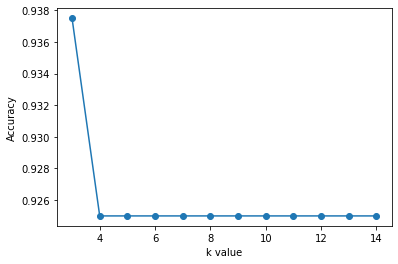

In [ ]:
plt.plot(neighbors,acc_values , "o-")
plt.xlabel("k value")
plt.ylabel("Accuracy")

In [ ]:
# with above graph its clear all values give same performance
classifier = KNeighborsClassifier(n_neighbors=5 , metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy is :'" , accuracy_score(y_test,y_pred))
print("precision is : " , precision_score(y_test,y_pred))
print("recall score is : " , recall_score(y_test,y_pred))
print("f1_score : " , f1_score(y_test,y_pred))

Accuracy is :' 0.925
precision is :  0.8666666666666667
recall score is :  0.9285714285714286
f1_score :  0.896551724137931


In [ ]:
confusion_matrix(y_test ,y_pred)

array([[48,  4],
       [ 2, 26]])

our accuracy is 92.5 and we only predicted 6 wrong values